In [8]:
import sys
!{sys.executable} -m pip install scikit-learn


[notice] A new release of pip is available: 25.0 -> 25.0.1
[notice] To update, run: C:\Users\Aila\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [194]:
import numpy as np # библиотека для работы с чиселками
import pandas as pd # data processing, работа с CSV файлами
import matplotlib.pyplot as plt # для графики
import ast
import seaborn as sns # аналогично
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from scipy.interpolate import CubicSpline
from scipy.optimize import root_scalar
from scipy.optimize import minimize_scalar


import warnings
warnings.simplefilter(action='ignore')

Откроем датасет и посмотрим первые 5 его строчек

In [182]:
dataset = pd.read_csv('Train_first_version.csv', encoding='utf-8-sig')
dataset.head(5)

,Unnamed: 0,ID скважины,name,rate_nom_sm3day,rate_opt_min_sm3day,rate_opt_max_sm3day,freq_Hz,rate_points,head_points,power_points,eff_points,stages_max,rate_max_sm3day,slip_nom_rpm,eff_max,manufacturer,name_PED,d_motor_mm,motor_nom_i,motor_amp_idle,motor_nom_power,NKT_bottom_depth,NKT_sections_info,NKT_roughness,motor_nom_freq,load_points,amperage_points,cosf_points,eff_points_PED,rpm_points,measured,absolute,bottom_depth,sections_info,roughness,NKT_bottom_depth.1,NKT_sections_info.1,NKT_roughness.1,Пакер,Количество ступеней насоса,k_gas_sep,КПД станции управления,КПД трансформатора,Глубина установки насоса,Удельное сопротивление кабеля,Длина кабеля,Относительная плотность газа,Относительная плотность нефти,Относительная плотность воды,Пластовое давление,Пластовая температура,Штуцер,Линейная температура,Время,"Дебит жидкости (объёмный), м3/сут","Обводненность (объёмная), %","Рбуф, атм","Давление линейное, атм","Давление на приеме насоса, атм","Загрузка ПЭД, %",Попутный газ,"Частота тока, Герц","Ток фазы А, A (ампер)","Мощность активная, кВт","Напряжение, АВ Вольт","P затрубное, атм"
0,0,10001,ЭЦНМТ 5А-200DP,200.0,161.0,260.0,50.0,"[10.865, 21.729, 32.594, 43.458, 54.323, 65.18...","[7.107, 7.073, 7.033, 6.993, 6.957, 6.929, 6.9...","[0.11800000000000001, 0.129, 0.139, 0.148, 0.1...","[0.07424, 0.13540000000000002, 0.1873300000000...",519.0,325.937,48.616667,0.6408,СЦ ЭПУ,ПЭДМТ160-117М1,117.0,59.0,59.0,160.0,2250.0,0.84,0.84,50.0,"[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.455, 0.47100000000000003, 0.495, 0.528, 0.5...","[0.151, 0.298, 0.423, 0.528, 0.615, 0.686, 0.7...","[0.001, 0.373, 0.607, 0.741, 0.808, 0.834, 0.8...","[2973.69, 2961.0, 2948.32, 2935.63, 2922.95, 2...",2910.0,"[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....",2806.6,"[{'MD': 6.6, 'd': 146.8}, {'MD': 2548.0, 'd': ...",0.1,2720.69,"[{'MD': 699.01, 'd': 62.0}, {'MD': 1638.28, 'd...",0.1,False,453,0.5,0.97,0.97,2751.61,0.0,2760,0.7,0.828,1.021,179.9,97.0,32.0,16.8802,1.715666e+09,189.6740,90.250,20.25,18.31235,86.6,75.0,1986.735,51.0,46.8,192.0,401.0,21.25
1,1,10001,ЭЦНМТ 5А-200DP,200.0,161.0,260.0,50.0,"[10.865, 21.729, 32.594, 43.458, 54.323, 65.18...","[7.107, 7.073, 7.033, 6.993, 6.957, 6.929, 6.9...","[0.11800000000000001, 0.129, 0.139, 0.148, 0.1...","[0.07424, 0.13540000000000002, 0.1873300000000...",519.0,325.937,48.616667,0.6408,СЦ ЭПУ,ПЭДМТ160-117М1,117.0,59.0,59.0,160.0,2250.0,0.84,0.84,50.0,"[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.455, 0.47100000000000003, 0.495, 0.528, 0.5...","[0.151, 0.298, 0.423, 0.528, 0.615, 0.686, 0.7...","[0.001, 0.373, 0.607, 0.741, 0.808, 0.834, 0.8...","[2973.69, 2961.0, 2948.32, 2935.63, 2922.95, 2...",2910.0,"[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....",2806.6,"[{'MD': 6.6, 'd': 146.8}, {'MD': 2548.0, 'd': ...",0.1,2720.69,"[{'MD': 699.01, 'd': 62.0}, {'MD': 1638.28, 'd...",0.1,False,453,0.5,0.97,0.97,2751.61,0.0,2760,0.7,0.828,1.021,179.9,97.0,32.0,16.8802,1.715687e+09,190.2895,90.830,20.25,18.39130,86.4,75.0,1929.115,51.0,46.8,192.0,401.0,21.25
2,2,10001,ЭЦНМТ 5А-200DP,200.0,161.0,260.0,50.0,"[10.865, 21.729, 32.594, 43.458, 54.323, 65.18...","[7.107, 7.073, 7.033, 6.993, 6.957, 6.929, 6.9...","[0.11800000000000001, 0.129, 0.139, 0.148, 0.1...","[0.07424, 0.13540000000000002, 0.1873300000000...",519.0,325.937,48.616667,0.6408,СЦ ЭПУ,ПЭДМТ160-117М1,117.0,59.0,59.0,160.0,2250.0,0.84,0.84,50.0,"[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.455, 0.47100000000000003, 0.495, 0.528, 0.5...","[0.151, 0.298, 0.423, 0.528, 0.615, 0.686, 0.7...","[0.001, 0.373, 0.607, 0.741, 0.808, 0.834, 0.8...","[2973.69, 2961.0, 2948.32, 2935.63, 2922.95, 2...",2910.0,"[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....",2806.6,"[{'MD': 6.6, 'd': 146.8}, {'MD': 2548.0, 'd': ...",0.1,2720.69,"[{'MD': 699.01, 'd': 62.0}, {'MD': 1638.28, 'd...",0.1,False,453,0.5,0.97,0.97,2751.61,0.0,2760,0.7,0.828,1.021,179.9,97.0,32.0,16.8802,1.715709e+09,200.3125,90.005,20.25,18.36665,86.1,75.0,2142.915,51.0,46.8,192.0

In [237]:
dataset2 = pd.read_csv('changed_static_dataset_v4.csv', encoding='utf-8-sig')
dataset2.head(5)

,ID скважины,name,rate_nom_sm3day,rate_opt_min_sm3day,rate_opt_max_sm3day,freq_Hz,rate_points,head_points,power_points,eff_points,stages_max,rate_max_sm3day,slip_nom_rpm,eff_max,manufacturer,name_PED,d_motor_mm,motor_nom_i,motor_amp_idle,motor_nom_power,NKT_bottom_depth,NKT_sections_info,NKT_roughness,motor_nom_freq,load_points,amperage_points,cosf_points,eff_points_PED,rpm_points,measured,absolute,bottom_depth,sections_info,roughness,NKT_bottom_depth.1,NKT_sections_info.1,NKT_roughness.1,Пакер,Количество ступеней насоса,k_gas_sep,КПД станции управления,КПД трансформатора,Глубина установки насоса,Удельное сопротивление кабеля,Длина кабеля,Относительная плотность газа,Относительная плотность нефти,Относительная плотность воды,Пластовое давление,Пластовая температура,Штуцер,Линейная температура
0,10001,ЭЦНМТ 5А-200DP,200.0,161.0,260.0,50.0,"[10.865, 21.729, 32.594, 43.458, 54.323, 65.18...","[7.107, 7.073, 7.033, 6.993, 6.957, 6.929, 6.9...","[0.11800000000000001, 0.129, 0.139, 0.148, 0.1...","[0.07424, 0.13540000000000002, 0.1873300000000...",519.0,325.937,48.616667,0.6408,СЦ ЭПУ,ПЭДМТ160-117М1,117.0,59.0,59.0,160.000000,2250.0,0.8400,0.840,50.0,"[0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5,...","[0.455, 0.47100000000000003, 0.495, 0.528, 0.5...","[0.151, 0.298, 0.423, 0.528, 0.615, 0.686, 0.7...","[0.001, 0.373, 0.607, 0.741, 0.808, 0.834, 0.8...","[2973.69, 2961.0, 2948.32, 2935.63, 2922.95, 2...",2910.0,"[10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80....",2806.60,"[{'MD': 6.6, 'd': 146.8}, {'MD': 2548.0, 'd': ...",0.1,2720.69,"[{'MD': 699.01, 'd': 62.0}, {'MD': 1638.28, 'd...",0.1,False,453,0.50,0.97,0.97,2751.61,0.000000,2760,0.7,0.828,1.021,179.900000,97.0,32.0,16.8802
1,10002,ЭЦН5А-200,200.0,150.0,250.0,50.0,"[0.0, 100.0, 150.0, 200.0, 250.0, 300.0]","[6.02, 5.95, 5.69, 4.82, 3.43, 1.77]","[0.0951, 0.1472, 0.17400000000000002, 0.1832, ...","[0.0, 0.46, 0.56, 0.6000000000000001, 0.53, 0.31]",414.0,300.000,48.500000,0.6200,Лысьванефтемаш,1ЭДБ140-117 В5,117.0,57.0,57.0,140.248269,2000.0,0.8450,0.860,50.0,"[0.03, 0.09, 0.19, 0.46, 0.62, 0.77, 0.91, 1.0...","[0.39, 0.4, 0.43, 0.56, 0.68, 0.79, 0.92, 1.1,...","[0.14200000000000002, 0.248, 0.4, 0.678, 0.765...","[0.3718, 0.6452, 0.782, 0.8587, 0.8594, 0.8504...","[2994.0, 2985.0, 2970.0, 2925.0, 2895.0, 2865....",3915.0,"[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0...",3414.00,"[{'MD': 1157.4, 'd': 159.6}, {'MD': 2246.1, 'd...",0.1,3069.62,"[{'MD': 1005.59, 'd': 62.0}, {'MD': 1311.22, '...",0.1,False,387,0.70,0.97,0.97,3095.74,3.086687,3230,0.7,0.851,1.017,149.000000,89.0,18.0,5.0000
2,10003,30.1ЭЦНДИ5А-160М,160.0,125.0,200.0,50.0,"[0.0, 50.0, 75.0, 100.0, 125.0, 150.0, 160.0, ...","[6.4, 6.5, 6.55, 6.55, 6.4, 5.9, 5.6, 5.0, 3.7...","[0.09870000000000001, 0.127, 0.1386, 0.1523000...","[0.0, 0.29050000000000004, 0.40230000000000005...",414.0,245.000,48.500000,0.6090,Борец,9ЭДБТ100-117Э/2700М8В5,117.0,30.2,30.2,100.000000,2700.0,0.8450,0.840,50.0,"[0.4, 0.5, 0.6000000000000001, 0.7000000000000...","[0.54, 0.61, 0.6900000000000001, 0.77, 0.85, 0...","[0.7000000000000001, 0.74, 0.77, 0.8, 0.830000...","[0.78, 0.8300000000000001, 0.85, 0.86, 0.87, 0...","[3568.604, 3551.63, 3534.656, 3517.682, 3500.7...",3951.0,"[0.0, 10.0, 20.0, 30.0, 40.0, 50.0, 60.0, 70.0...",3339.30,"[{'MD': 2254.4, 'd': 159.6}, {'MD': 3260.0, 'd...",0.1,3109.34,"[{'MD': 846.78, 'd': 62.0}, {'MD': 917.49, 'd'...",0.1,False,459,0.65,0.97,0.97,3137.14,2.002203,3178,0.7,0.851,1.017,146.000000,89.0,18.0,5.0000
3,10004,ВНН5А-100,100.0,70.0,140.0,50.0,"[0.0, 40.0, 70.0, 100.0, 140.0, 160.0]","[8.39, 8.68, 8.35, 7.41, 5.08, 3.24]","[0.1061, 0.1217, 0.1326, 0.1451, 0.1655, 0.1769]","[0.0, 0.32, 0.5, 0.584, 0.49, 0.33]",414.0,160.000,48.500000,0.5800,Новомет,ПЭДН80-117-2100/041,117.0,30.7,30.7,80.000000,2100.0,0.8220,0.835,50.0,"[0.4, 0.5, 0.6000000000000001, 0.7000000000000...","[0.54, 0.61, 0.6900000000000001, 0.77, 0.85, 0...","[0.7000000000000001, 0.74, 0.77, 0.8, 0.830000...","[0.78, 0.8300000000000001, 0.85, 0.86,

In [184]:
dataset.columns.tolist()

['Unnamed: 0',
 'ID скважины',
 'name',
 'rate_nom_sm3day',
 'rate_opt_min_sm3day',
 'rate_opt_max_sm3day',
 'freq_Hz',
 'rate_points',
 'head_points',
 'power_points',
 'eff_points',
 'stages_max',
 'rate_max_sm3day',
 'slip_nom_rpm',
 'eff_max',
 'manufacturer',
 'name_PED',
 'd_motor_mm',
 'motor_nom_i',
 'motor_amp_idle',
 'motor_nom_power',
 'NKT_bottom_depth',
 'NKT_sections_info',
 'NKT_roughness',
 'motor_nom_freq',
 'load_points',
 'amperage_points',
 'cosf_points',
 'eff_points_PED',
 'rpm_points',
 'measured',
 'absolute',
 'bottom_depth',
 'sections_info',
 'roughness',
 'NKT_bottom_depth.1',
 'NKT_sections_info.1',
 'NKT_roughness.1',
 'Пакер',
 'Количество ступеней насоса',
 'k_gas_sep',
 'КПД станции управления',
 'КПД трансформатора',
 'Глубина установки насоса',
 'Удельное сопротивление кабеля',
 'Длина кабеля',
 'Относительная плотность газа',
 'Относительная плотность нефти',
 'Относительная плотность воды',
 'Пластовое давление',
 'Пластовая температура',
 'Штуцер',

In [203]:
dataset['Пакер'].info()

<class 'pandas.core.series.Series'>
Index: 17667 entries, 0 to 18583
Series name: Пакер
Non-Null Count  Dtype
--------------  -----
17667 non-null  bool 
dtypes: bool(1)
memory usage: 671.3 KB


In [119]:
pd.set_option('display.max_columns', None)

In [120]:
pd.options.display.max_rows = 100

In [200]:
dataset.()


Unnamed: 0                           17667
ID скважины                          17667
name                                 17667
rate_nom_sm3day                      17667
rate_opt_min_sm3day                  17667
rate_opt_max_sm3day                  17667
freq_Hz                              17667
rate_points                          17667
head_points                          17667
power_points                         17667
eff_points                           17667
stages_max                           17667
rate_max_sm3day                      17667
slip_nom_rpm                         17667
eff_max                              17667
manufacturer                         17667
name_PED                             17667
d_motor_mm                           17667
motor_nom_i                          17667
motor_amp_idle                       17667
motor_nom_power                      17667
NKT_bottom_depth                     17667
NKT_sections_info                    17667
NKT_roughne

In [199]:
dataset = dataset.dropna(subset=['P затрубное, атм'])

In [239]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13623 entries, 0 to 18578
Data columns (total 67 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         13623 non-null  int64  
 1   ID скважины                        13623 non-null  int64  
 2   name                               13623 non-null  object 
 3   rate_nom_sm3day                    13623 non-null  float64
 4   rate_opt_min_sm3day                13623 non-null  float64
 5   rate_opt_max_sm3day                13623 non-null  float64
 6   freq_Hz                            13623 non-null  float64
 7   rate_points                        13623 non-null  object 
 8   head_points                        13623 non-null  object 
 9   power_points                       13623 non-null  object 
 10  eff_points                         13623 non-null  object 
 11  stages_max                         13623 non-null  float64


In [219]:
X.columns.tolist()

['Unnamed: 0',
 'ID скважины',
 'slip_nom_rpm',
 'motor_nom_i',
 'motor_amp_idle',
 'NKT_sections_info',
 'NKT_roughness',
 'measured',
 'roughness',
 'Количество ступеней насоса',
 'k_gas_sep',
 'Глубина установки насоса',
 'Относительная плотность газа',
 'Относительная плотность нефти',
 'Относительная плотность воды',
 'Пластовое давление',
 'Пластовая температура',
 'Штуцер',
 'Линейная температура',
 'Время',
 'Обводненность (объёмная), %',
 'Рбуф, атм',
 'Давление линейное, атм',
 'Давление на приеме насоса, атм',
 'Загрузка ПЭД, %',
 'Попутный газ',
 'Напряжение, АВ Вольт',
 'KPD']

In [231]:
#new_dataset = dataset.copy()

'''
# Кодирование категориальных признаков
categorical_columns = ['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    new_dataset[column] = le.fit_transform(new_dataset[column])
    label_encoders[column] = le  # Сохраняем энкодеры, если понадобится обратное преобразование
'''
## Зададим функцию бисекции
def custom_bisection(func, F_value, a, b, EPSILON=1e-6):

  if (func(a) == F_value):
    return a;
  if (func(b) == F_value):
    return b;

  while ((b-a) >= EPSILON):
      m = (a+b)/2
      if (func(m) == F_value):
        return m
      elif func(m) > F_value:
        b = m
      else:
        a = m

  return m
    
def KPD_kabelya(P, I, p, l):
      return (P)/(P+I**2*(p*l/1000))

# Парсинг паспортных данных ЭЦН
def parse_sections(row):
    try:
        if isinstance(row, str):
            return ast.literal_eval(row)
        return row
    except (ValueError, SyntaxError):
        return []


dataset['rate_points'] = dataset['rate_points'].apply(parse_sections)
dataset['head_points'] = dataset['head_points'].apply(parse_sections)
dataset['power_points'] = dataset['power_points'].apply(parse_sections)
dataset['eff_points'] = dataset['eff_points'].apply(parse_sections)


KPD = []
 # Фича с пакером

for i in range (0, len(dataset['Пакер'])):
    #dataset['absolute'][i] = max(dataset['absolute'][i])
    if dataset['Пакер'].iloc[i] == False:
        dataset['Давление на приеме насоса, атм'].iloc[i] -= dataset['P затрубное, атм'].iloc[i]
     
# Фича с КПД

    
    #Raschet KPD kabelya:
    P = dataset['Мощность активная, кВт'].iloc[i]
    I = dataset['Ток фазы А, A (ампер)'].iloc[i]
    p = dataset['Удельное сопротивление кабеля'].iloc[i]
    l = dataset['Длина кабеля'].iloc[i]
    N_kabelya = KPD_kabelya(P, I, p, l)

    
    # HQX
    x = dataset['rate_points'].iloc[i]
    y = dataset['head_points'].iloc[i]
    coeffs = np.polyfit(x, y, deg=3)
    HQX = np.poly1d(coeffs)
    y_pred = HQX(x)
    
    # NQX
    x=dataset['rate_points'].iloc[i]
    y=dataset['eff_points'].iloc[i]
    NQX = CubicSpline(x, y, bc_type='natural')
    x2 = np.linspace(min(x), max(x), 100)
    y2 = NQX(x2)
    
    #PQX
    x=dataset['rate_points'].iloc[i]
    y=dataset['power_points'].iloc[i]
    PQX = CubicSpline(x, y, bc_type='natural')
    x3 = np.linspace(min(x), max(x), 100)
    y3 = PQX(x3)

    '''
    #Рисуем графики 
    fig, ax1 = plt.subplots(figsize=(12, 6))
    
    ax1.plot(x, y_pred, color="blue", label="HQX")
    ax1.set_xlabel("Q, м3/сут")
    ax1.set_ylabel("H, м", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")
    
    ax2 = ax1.twinx()
    ax2.plot(x2, y2 , color="red", label="NQX")
    ax2.set_ylabel("КПД", color="red")
    ax2.tick_params(axis="y", labelcolor="red")
    
    ax3 = ax1.twinx()
    ax3.spines["right"].set_position(("outward", 60))
    ax3.plot(x3, y3, color="green", label='PQX')
    ax3.set_ylabel("P, kWt", color="green")
    ax3.tick_params(axis="y", labelcolor="green")
    
    # Объединяем легенды
    lines1, labels1 = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    lines3, labels3 = ax3.get_legend_handles_labels()
    ax1.legend(
        lines1 + lines2 + lines3,
        labels1 + labels2 + labels3,
        loc="upper left",
    
    )
    
    plt.title("Характеристики ЭЦН")
    plt.tight_layout()
    plt.show()
'''

    k = dataset['Количество ступеней насоса'].iloc[i]
    P=P/k
    Q_min=dataset['rate_opt_min_sm3day'].iloc[i]
    Q_max=dataset['rate_opt_max_sm3day'].iloc[i]
    a = Q_min-100
    b = Q_max+100
    Q_current=custom_bisection(PQX, P, a, b)
    N_kabelya = NQX(Q_current) #кпд эцн
    KPD.append(N_kabelya*dataset['КПД трансформатора'].iloc[i]*dataset['КПД станции управления'].iloc[i])

dataset['KPD'] = KPD


In [238]:
dataset = dataset.dropna(subset=['KPD'])

In [241]:
# Разделение на признаки и целевую переменную
X = dataset.drop(columns=['Дебит жидкости (объёмный), м3/сут', 'Пакер', 'P затрубное, атм', 'name', 'rate_nom_sm3day',
 'rate_opt_min_sm3day', 'rate_opt_max_sm3day',
 'freq_Hz',
 'rate_points',
 'head_points',
 'power_points',
 'eff_points',
 'stages_max',
 'rate_max_sm3day',
 'manufacturer',
 'name_PED',
 'd_motor_mm', 'motor_nom_power',
 'NKT_bottom_depth','motor_nom_freq',
 'load_points',
 'amperage_points',
 'cosf_points',
 'eff_points_PED',
 'rpm_points',
                              'absolute',
 'bottom_depth',
 'sections_info',
                              'NKT_bottom_depth.1',
 'NKT_sections_info.1',
 'NKT_roughness.1',
'Удельное сопротивление кабеля',
 'Длина кабеля',

               'Частота тока, Герц',
 'Ток фазы А, A (ампер)',
 'Мощность активная, кВт'                          
])
y_train = dataset['Дебит жидкости (объёмный), м3/сут']

# Масштабирование числовых признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train = X_scaled

In [233]:
X_train.shape

(17667, 28)

In [234]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 17667 entries, 0 to 18583
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      17667 non-null  int64  
 1   ID скважины                     17667 non-null  int64  
 2   slip_nom_rpm                    17667 non-null  float64
 3   motor_nom_i                     17667 non-null  float64
 4   motor_amp_idle                  17667 non-null  float64
 5   NKT_sections_info               17667 non-null  float64
 6   NKT_roughness                   17667 non-null  float64
 7   measured                        17667 non-null  float64
 8   roughness                       17667 non-null  float64
 9   Количество ступеней насоса      17667 non-null  int64  
 10  k_gas_sep                       17667 non-null  float64
 11  Глубина установки насоса        17667 non-null  float64
 12  Относительная плотность газа    17667

In [245]:
def calculate_mape(y_true, y_pred):
    # Преобразуем в numpy массивы для удобства работы
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    
    # Проверка на нулевые значения в y_true, чтобы избежать деления на ноль
    if np.any(y_true == 0):
        raise ValueError("В реальных значениях не может быть нулей для вычисления MAPE")
    
    # Вычисляем MAPE
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return mape


In [255]:
# Группируем по скважинам и считаем медиану дебита
median_by_well = dataset.groupby('ID скважины')['Дебит жидкости (объёмный), м3/сут'].median()
# Для каждой строки получаем соответствующую медиану скважины
y_pred = dataset['ID скважины'].map(median_by_well)
# Реальные значения
y_true = dataset['Дебит жидкости (объёмный), м3/сут']

y_safe = np.where(y_pred == 0, 1e-8, y_pred)
# Расчет метрик
base_mape = mean_absolute_percentage_error(y_pred, train_predict) * 100  # умножаем на 100 для %
#test1_mape = mean_absolute_percentage_error(y_test, test1_predict) * 100

print('Метрика MAPE для градиентного бустинга из коробки:')
print('Train', base_mape)
print(mean_absolute_error(y_pred, train_predict))
#print('Test', test1_mape)

Метрика MAPE для градиентного бустинга из коробки:
Train 1.9224359794455638e+17
8.676167422692062


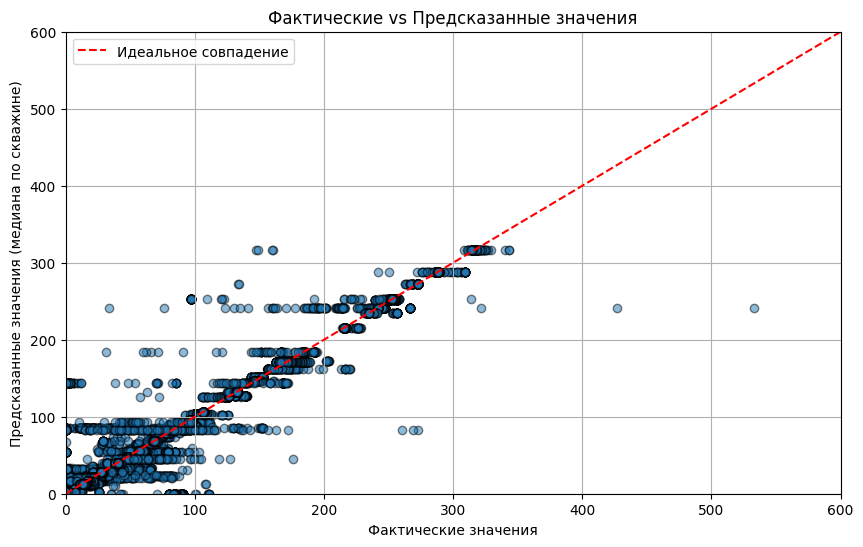

In [170]:
plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5, edgecolors='k')
plt.plot([0, 600], [0, 600], 'r--', label='Идеальное совпадение')
plt.xlabel('Фактические значения')
plt.ylabel('Предсказанные значения (медиана по скважине)')
plt.title('Фактические vs Предсказанные значения')
plt.xlim(0, 600)
plt.ylim(0, 600)
plt.legend()
plt.grid(True)
plt.show()


Обучим модель Градиентного бустинга

In [242]:
model = GradientBoostingRegressor(
    n_estimators=100, 
    learning_rate=0.1, 
    max_depth=5, 
    random_state=42
)

model.fit(X_train, y_train)

GradientBoostingRegressor(max_depth=5, random_state=42)

Оценим работу

In [243]:
train_predict = model.predict(X_train)
#test1_predict = model.predict(X_test1)

In [174]:
num_zeros = (y_train == 0).sum()

print(f"Количество нулевых значений в колонке 'col1': {num_zeros}")


Количество нулевых значений в колонке 'col1': 636


In [262]:
# Расчет метрик
train_mape = mean_absolute_percentage_error(train_predict, y_pred) * 100  # умножаем на 100 для %
#test1_mape = mean_absolute_percentage_error(y_test, test1_predict) * 100

print('Метрика MAPE для градиентного бустинга из коробки:')
print('Train', calculate_mape(y_safe, train_predict))
#print('Test', test1_mape)

Метрика MAPE для градиентного бустинга из коробки:
Train 4268665761.766741


# Улучшение бейзлайна

Для улучшения бейзлайна модели в данной задаче предлагаю следующие решения:

Удалить столбцы с высокой кореляцией, закодировать категориальные признаки более информативно (используя One-Hot Encoding), а также использовать метод GridSearchCV для поиска лучших параметров.

Для начала посмотрим матрицу кореляций для данного датасета

In [93]:
X.corr()

,Unnamed: 0,ID скважины,rate_nom_sm3day,slip_nom_rpm,eff_max,motor_nom_i,motor_amp_idle,motor_nom_power,NKT_roughness,motor_nom_freq,measured,bottom_depth,roughness,Количество ступеней насоса,k_gas_sep,КПД станции управления,КПД трансформатора,Глубина установки насоса,Удельное сопротивление кабеля,Относительная плотность газа,Относительная плотность нефти,Относительная плотность воды,Пластовое давление,Пластовая температура,Штуцер,Линейная температура,"Обводненность (объёмная), %","Рбуф, атм","Давление линейное, атм","Давление на приеме насоса, атм","Загрузка ПЭД, %",Попутный газ,"Частота тока, Герц","Ток фазы А, A (ампер)","Мощность активная, кВт","Напряжение, АВ Вольт"
Unnamed: 0,1.000000,0.869536,-0.222229,0.052700,-0.207849,-0.282179,-0.276634,-0.256846,-0.029050,0.105315,-0.047309,-0.041760,NaN,-0.138583,0.085969,NaN,NaN,-0.051653,-0.024155,0.106508,0.248032,-0.325024,-0.214202,0.075586,0.093806,0.268204,-0.301609,0.206107,0.203237,-0.112341,-0.698386,-0.099451,-0.591229,-0.582382,-0.568603,0.087923
ID скважины,0.869536,1.000000,-0.251691,0.006804,-0.227475,-0.222586,-0.227405,-0.240010,-0.037529,0.043810,-0.068894,-0.045516,NaN,-0.180317,0.006540,NaN,NaN,-0.030746,-0.021227,0.158158,0.126899,-0.204733,-0.248890,0.160990,0.019790,0.341094,-0.320203,0.177772,0.206262,-0.129185,-0.740422,-0.034191,-0.674269,-0.616278,-0.568899,0.048697
rate_nom_sm3day,-0.222229,-0.251691,1.000000,0.200117,0.797154,0.724223,0.716820,0.909329,-0.091035,-0.078246,0.221106,0.205892,NaN,-0.032481,0.151358,NaN,NaN,0.116911,0.023061,-0.269875,-0.249290,0.357615,-0.039190,-0.045568,0.013070,-0.077232,0.081371,-0.154756,-0.184191,-0.121855,0.197574,0.271544,0.118787,0.629001,0.673521,0.015487
slip_nom_rpm,0.052700,0.006804,0.200117,1.000000,0.058455,0.059771,0.056435,0.165974,0.236307,0.506288,0.090457,0.081229,NaN,-0.310048,0.084983,NaN,NaN,0.044362,0.182512,-0.059437,0.009472,0.027077,-0.109430,-0.059093,0.076858,-0.028331,-0.129100,0.038298,0.137066,-0.028788,-0.086282,0.236405,0.058834,-0.035992,-0.033055,-0.057986
eff_max,-0.207849,-0.227475,0.797154,0.058455,1.000000,0.563013,0.559583,0.727102,-0.318074,-0.206014,0.219001,0.186489,NaN,-0.064214,0.155173,NaN,NaN,0.095760,-0.023715,-0.433756,-0.311004,0.466392,0.042229,-0.106509,0.110626,-0.039605,-0.051409,-0.196769,-0.135937,-0.093089,0.210052,0.130505,0.060225,0.504485,0.532569,-0.013046
motor_nom_i,-0.282179,-0.222586,0.724223,0.059771,0.563013,1.000000,0.990961,0.836002,-0.107347,-0.050652,0.137091,0.195978,NaN,-0.005862,0.116670,NaN,NaN,0.154341,-0.013296,-0.162977,-0.304769,0.368115,0.039736,0.080739,-0.029366,-0.012267,0.073195,-0.087767,-0.028340,-0.094737,0.201167,0.169915,0.070673,0.651447,0.669559,0.026630
motor_amp_idle,-0.276634,-0.227405,0.716820,0.056435,0.559583,0.990961,1.000000,0.827357,-0.123164,-0.054140,0.117297,0.187730,NaN,0.010810,0.099903,NaN,NaN,0.150133,-0.029118,-0.157766,-0.305374,0.370478,0.043470,0.078616,-0.041524,-0.012477,0.089849,-0.074920,-0.020378,-0.094749,0.209947,0.146511,0.071281,0.652246,0.665766,0.029442
motor_nom_power,-0.256846,-0.240010,0.909329,0.165974,0.727102,0.836002,0.827357,1.000000,-0.125119,-0.043240,0.233710,0.284791,NaN,0.011540,0.141124,NaN,NaN,0.206811,-0.037208,-0.244364,-0.259426,0.374704,0.026419,0.083778,-0.058277,-0.029164,0.105500,-0.053340,-0.096925,-0.118949,0.200994,0.241681,0.101158,0.609916,0.712255,0.060878
NKT_roughness,-0.029050,-0.037529,-0.091035,0.236307,-0.318074,-0.107347,-0.123164,-0.125119,1.000000,0.559873,-0.104752,-0.171491,NaN,-0.117436,-0.026781,NaN,NaN,-0.131087,0.081969,0.260556,0.094678,-0.138095,-0.129222,-0.054374,-0.078325,-0.084528,0.185902,0.001034,-0.073308,-0.011296,-0.020878,0.158605,0.248277,-0.071934,-0.086658,0.059983
motor_nom_freq,0.105315,0.043810,-0.078246,0.506288,-0.206014,-0.050652,-0.054140,-0.043240,0.559873,1.000000,0.066025,0.076701,NaN,-0.178428,0.170142,NaN,NaN,0.051027,0.191315,-0.021052,0.181364,-0.171929,0.090102,-0.068564,-0.035760,-0.042997,-0.078640,0.086243,0.105192,-0.063740,-

In [98]:
correlation_matrix = dataset.corr()
# Расплавляем матрицу, чтобы получить пары
corr_pairs = correlation_matrix.unstack()
# Удаляем самокорреляции (т.е. корреляции столбца с самим собой)
corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]
# Сортируем по убыванию абсолютного значения корреляции
sorted_pairs = corr_pairs.abs().sort_values(ascending=False)
# Показываем топ N пар
top_pairs = sorted_pairs.head(20)
print(top_pairs)


motor_amp_idle                 motor_nom_i                      0.990961
motor_nom_i                    motor_amp_idle                   0.990961
Рбуф, атм                      P затрубное, атм                 0.984593
P затрубное, атм               Рбуф, атм                        0.984593
Глубина установки насоса       bottom_depth                     0.919338
bottom_depth                   Глубина установки насоса         0.919338
Ток фазы А, A (ампер)          Мощность активная, кВт           0.915537
Мощность активная, кВт         Ток фазы А, A (ампер)            0.915537
motor_nom_power                rate_nom_sm3day                  0.909329
rate_nom_sm3day                motor_nom_power                  0.909329
Unnamed: 0                     ID скважины                      0.869536
ID скважины                    Unnamed: 0                       0.869536
Относительная плотность нефти  Относительная плотность воды     0.863178
Относительная плотность воды   Относительная плотно

In [ ]:
dataset = dataset.drop(columns=['Weight'])

In [ ]:
dataset

In [157]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [158]:
new_X_train = X_train
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
param_grid = {
    'regressor__n_estimators': [50, 100, 150],
    'regressor__learning_rate': [0.01, 0.1, 0.2],
    'regressor__max_depth': [3, 5, 7],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(pipeline, param_grid)
grid_search.fit(new_X_train, y_train)

print("Best parameters for the task:", grid_search.best_params_)


KeyboardInterrupt: 

In [ ]:
pipeline.fit(new_X_train)

X_train_preprocessed = pipeline.transform(new_X_train)
#X_test_preprocessed = pipeline.transform(new_X_test)

Обучим модели и оценим их работу

In [ ]:
new_model = GradientBoostingRegressor(learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=150)

new_model.fit(X_train_preprocessed, y_train)

In [ ]:
new_train_predict = new_model.predict(X_train_preprocessed)
#new_test_predict = new_model.predict(X_test_preprocessed)

In [ ]:
# Расчет метрик
new_train_mape = mean_absolute_percentage_error(y_train, new_train_predict) * 100  # умножаем на 100 для %
#new_test1_mape = mean_absolute_percentage_error(y_test, new_test1_predict) * 100

print('Метрика MAPE для улучшенного бейзлайна:')
print('Train', new_train_mape)
#print('Test', new_test1_mape)

### Имплементация алгоритма

In [159]:
from collections import Counter
from sklearn.base import BaseEstimator

In [160]:
class GRADIENTBOOSTINGREGRESSOR(BaseEstimator):
    def __init__(self, n_estimators=100, learning_rate=0.1, max_depth=3, random_state=None):
        self.n_estimators = n_estimators
        self.learning_rate = learning_rate
        self.max_depth = max_depth
        self.random_state = random_state
        self.trees = []

    def fit(self, X, y):
        np.random.seed(self.random_state)
        self.trees = []
        self.init_prediction = np.mean(y)  # Начальное предсказание - среднее значение
        predictions = np.full(len(y), self.init_prediction)

        for _ in range(self.n_estimators):
            # Вычисление псевдоостатков
            residuals = y - predictions

            # Обучение дерева на остатки
            from sklearn.tree import DecisionTreeRegressor
            tree = DecisionTreeRegressor(max_depth=self.max_depth, random_state=self.random_state)
            tree.fit(X, residuals)

            # Обновление предсказаний
            update = self.learning_rate * tree.predict(X)
            predictions += update

            # Сохранение дерева
            self.trees.append(tree)

    def predict(self, X):
        # Предсказание на основе всех деревьев
        predictions = np.full(X.shape[0], self.init_prediction)
        for tree in self.trees:
            predictions += self.learning_rate * tree.predict(X)
        return predictions

In [257]:
# Применение собственной реализации
gb_regressor = GRADIENTBOOSTINGREGRESSOR(n_estimators=100, learning_rate=0.1, max_depth=7, random_state=42)
gb_regressor.fit(X_train, y_train)

my_train_predict = gb_regressor.predict(X_train)
#my_test_predict = gb_regressor.predict(X_test)

In [261]:
# Расчет метрик
my_train_mape = mean_absolute_percentage_error(my_train_predict, y_pred) * 100  # умножаем на 100 для %
#my_test1_mape = mean_absolute_percentage_error(y_test, my_test1_predict) * 100

print('Метрика MAPE для своей реализации:')
print('Train', calculate_mape(y_safe, my_train_predict))
#print('Test', my_test1_mape)

Метрика MAPE для своей реализации:
Train 4254577476.452536


Посмотрим работу алгоритма на улучшенном датасете

In [ ]:
# Применение собственной реализации для регрессии
gb_regressor = GRADIENTBOOSTINGREGRESSOR(n_estimators=100, learning_rate=0.2, max_depth=10, random_state=42)
gb_regressor.fit(X_train_preprocessed, y_train)

new_my_train_predict = gb_regressor.predict(X_train_preprocessed)
new_my_test_predict = gb_regressor.predict(X_test_preprocessed)

In [ ]:
# Расчет метрик
new_my_train_mape = mean_absolute_percentage_error(y_train, new_my_train_predict) * 100  # умножаем на 100 для %
#new_my_test1_mape = mean_absolute_percentage_error(y_test, new_my_test1_predict) * 100

print('Метрика MAPE для своей реализации на улучшенном бейзлайне:')
print('Train', new_my_train_mape)
#print('Test', new_my_test1_mape)